In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\KIIT\Desktop\MachineLearning\Paper1\Codes\datasets_1111_2005_kidney_disease.csv")

In [3]:
#Number of missing values in features
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

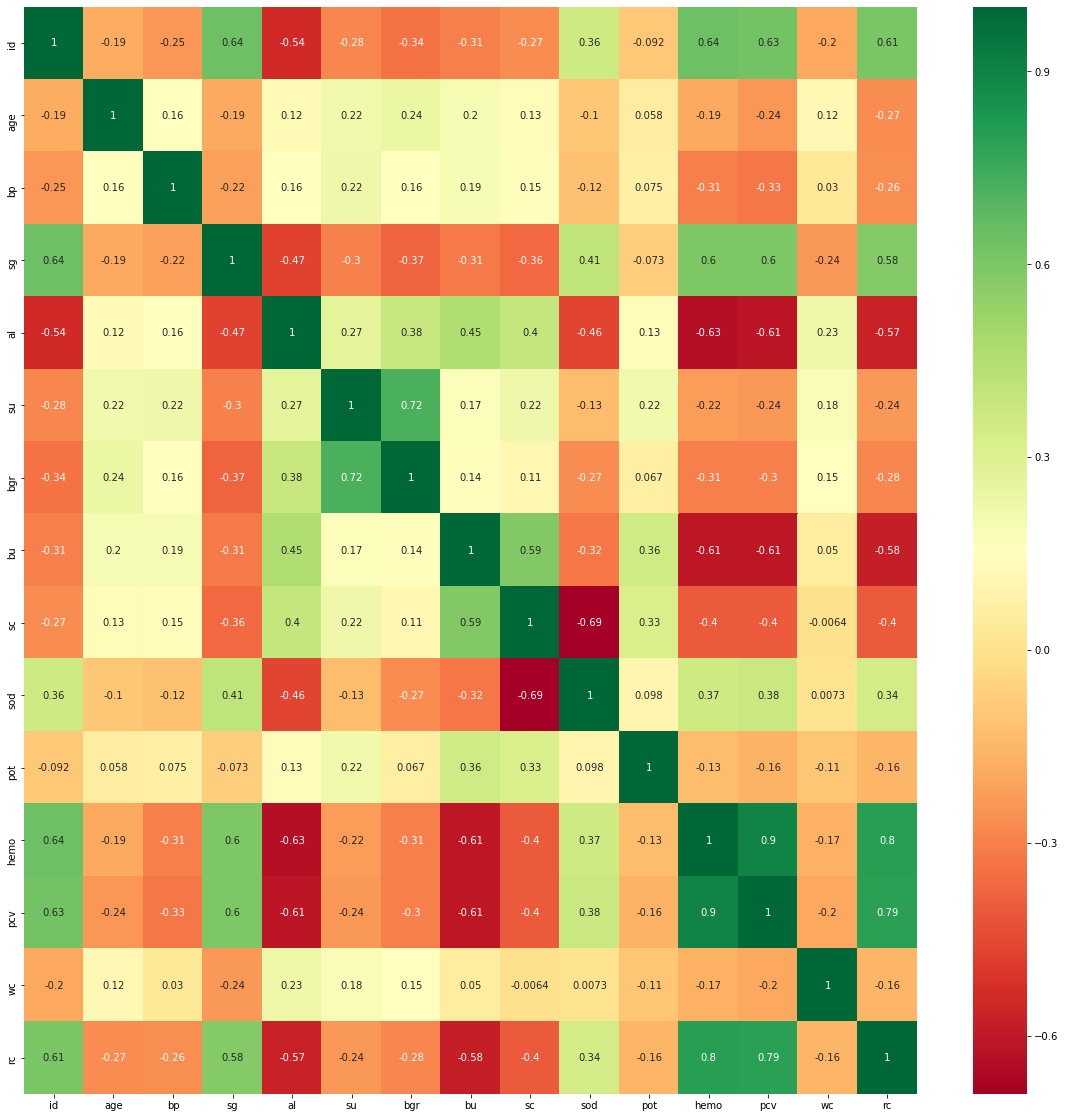

In [4]:
import seaborn as sns
#get correlations of each feature in dataset
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

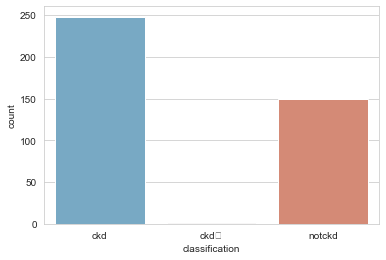

In [5]:
#checking balanced data or not
sns.set_style('whitegrid')
sns.countplot(x='classification',data=df,palette='RdBu_r')

In [6]:
#Filling missing data with mean value
df["bgr"]= df["bgr"].fillna(np.mean(df["bgr"]))
df["bu"]= df["bu"].fillna(np.mean(df["bu"]))
df["sc"]= df["sc"].fillna(np.mean(df["sc"]))
df["sod"]= df["sod"].fillna(np.mean(df["sod"]))
df["pot"]= df["pot"].fillna(np.mean(df["pot"]))
df["hemo"]= df["hemo"].fillna(np.mean(df["hemo"]))
df["pcv"]= df["pcv"].fillna(np.mean(df["pcv"]))
df["wc"]= df["wc"].fillna(np.mean(df["wc"]))
df["rc"]= df["rc"].fillna(np.mean(df["rc"]))

#Number of missing values in features
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [7]:
#Assigned the value 0 and 1 to the nominal features

df["rbc"] = [1 if i == "normal" else 0 for i in df["rbc"]]
df["pc"] = [1 if i == "normal" else 0 for i in df["pc"]]
df["pcc"] = [1 if i == "present" else 0 for i in df["pcc"]]
df["ba"] = [1 if i == "present" else 0 for i in df["ba"]]
df["htn"] = [1 if i == "yes" else 0 for i in df["htn"]]
df["dm"] = [1 if i == "yes" else 0 for i in df["dm"]]
df["cad"] = [1 if i == "yes" else 0 for i in df["cad"]]
df["appet"] = [1 if i == "good" else 0 for i in df["appet"]]
df["pe"] = [1 if i == "yes" else 0 for i in df["pe"]]
df["ane"] = [1 if i == "yes" else 0 for i in df["ane"]]
df["classification"] = [1 if i == "ckd" else 0 for i in df["classification"]]

#Number of missing values in features
df.isnull().sum()

id                 0
age                9
bp                12
sg                47
al                46
su                49
rbc                0
pc                 0
pcc                0
ba                 0
bgr                0
bu                 0
sc                 0
sod                0
pot                0
hemo               0
pcv                0
wc                 0
rc                 0
htn                0
dm                 0
cad                0
appet              0
pe                 0
ane                0
classification     0
dtype: int64

In [8]:
#Dropping all other rows with NaN values
df = df.dropna(axis=0)
#Number of missing values in features
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [9]:
X=df.drop(['classification'],axis=1)
y = df.iloc[:,25].values


In [10]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [11]:
#Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=5)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [13]:
#fitting logistic regression
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=1)
classifier_lr.fit(X_train,y_train)

#predicting results
y_pred_lr=classifier_lr.predict(X_test)
y_pred_problr = classifier_lr.decision_function(X_test)
y_pred_proba_lr=classifier_lr.predict_proba(X_test)

#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(y_test, y_pred_lr)
cm_lr

array([[28,  1],
       [ 2, 36]], dtype=int64)

In [14]:
from sklearn.model_selection import cross_val_score
score_lr=cross_val_score(classifier_lr,X,y,cv=10)
result_lr=score_lr.mean()
print(result_lr)
#mean accuracy=97.58%

0.975829991087344


In [51]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_lr = f1_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
print(f1_lr)
print(prec_lr)
print(recall_lr)
#f1_score=0.9599, precision=0.9729  ,recall= 0.9473

TP_lr = cm_lr[0][0]
FP_lr = cm_lr[0][1]
FN_lr = cm_lr[1][0]
TN_lr = cm_lr[1][1]

# calculate the sensitivity
lr_sensitivity = (TP_lr / float(TP_lr + FN_lr))    # calculate the specificity
lr_specificity = (TN_lr / float(TN_lr + FP_lr))
# calculate precision
lr_precision = (TN_lr / float(TN_lr + FP_lr))    # calculate f_1 score
lr_f1 = 2 * ((lr_precision * lr_sensitivity) / (lr_precision + lr_sensitivity))


# calculate MCC
import math
lr_x= (TP_lr +FP_lr) * (TP_lr + FN_lr) * (TN_lr + FP_lr) * (TN_lr + FN_lr)
lr_mcc = (TP_lr * TN_lr - FP_lr * FN_lr) / float(math.sqrt(lr_x))

print("Sensitivity ---> {0}".format(lr_sensitivity))
print("Specificity ---> {0}".format(lr_specificity))
print("MCC ---> {0}".format(lr_mcc))

0.9599999999999999
0.972972972972973
0.9473684210526315
Sensitivity ---> 0.9333333333333333
Specificity ---> 0.972972972972973
MCC ---> 0.9095900355647476


In [16]:
#creating classifier naive bayes
from sklearn.naive_bayes import GaussianNB
nb_classifier=GaussianNB()
nb_classifier.fit(X_train,y_train)

#predicting new test results
y_pred_nb= nb_classifier.predict(X_test)
y_pred_proba_nb = nb_classifier.predict_proba(X_test)



from sklearn.metrics import confusion_matrix
cm_nb=confusion_matrix(y_test,y_pred_nb)
cm_nb

array([[28,  1],
       [ 1, 37]], dtype=int64)

In [17]:
from sklearn.model_selection import cross_val_score
score_nb=cross_val_score(nb_classifier,X,y,cv=10)
result_nb=score_nb.mean()
print(result_nb)
#mean accuracy=96.67

0.9667557932263815


In [52]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_nb = f1_score(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
print(f1_nb)
print(prec_nb)
print(recall_nb)
#f1_score=0.9736, precision=0.9736, recall=0.9736

TP_nb = cm_nb[0][0]
FP_nb = cm_nb[0][1]
FN_nb = cm_nb[1][0]
TN_nb = cm_nb[1][1]

# calculate the sensitivity
nb_sensitivity = (TP_nb / float(TP_nb + FN_nb))    # calculate the specificity
nb_specificity = (TN_nb / float(TN_nb + FP_nb))

# calculate MCC
import math
nb_x= (TP_nb +FP_nb) * (TP_nb + FN_nb) * (TN_nb + FP_nb) * (TN_nb + FN_nb)
nb_mcc = (TP_nb * TN_nb - FP_nb * FN_nb) / float(math.sqrt(nb_x))

print("Sensitivity ---> {0}".format(nb_sensitivity))
print("Specificity ---> {0}".format(nb_specificity))
print("MCC ---> {0}".format(nb_mcc))

0.9736842105263158
0.9736842105263158
0.9736842105263158
Sensitivity ---> 0.9655172413793104
Specificity ---> 0.9736842105263158
MCC ---> 0.9392014519056261


In [19]:
#fitting svm
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear',random_state=0,probability=True)
svm_classifier.fit(X_train,y_train)

#predicting results
y_pred_svm=svm_classifier.predict(X_test)
y_pred_probsvm = svm_classifier.decision_function(X_test)
y_pred_proba_svm=svm_classifier.predict_proba(X_test)


#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_svm=confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[28,  1],
       [ 1, 37]], dtype=int64)

In [20]:
from sklearn.model_selection import cross_val_score
score_svm=cross_val_score(svm_classifier,X,y,cv=10)
result_svm=score_svm.mean()
print(result_svm)
#mean accuracy=97.54%

0.9754623440285204


In [53]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_svm = f1_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
print(f1_svm)
print(prec_svm)
print(recall_svm)
#f1_score=0.9736, precision=0.9736, recall=0.9736

TP_svm = cm_svm[0][0]
FP_svm = cm_svm[0][1]
FN_svm = cm_svm[1][0]
TN_svm = cm_svm[1][1]

# calculate the sensitivity
svm_sensitivity = (TP_svm / float(TP_svm + FN_svm))    # calculate the specificity
svm_specificity = (TN_svm / float(TN_svm + FP_svm))

# calculate MCC
import math
svm_x= (TP_svm +FP_svm) * (TP_svm + FN_svm) * (TN_svm + FP_svm) * (TN_svm + FN_svm)
svm_mcc = (TP_svm * TN_svm - FP_svm * FN_svm) / float(math.sqrt(svm_x))

print("Sensitivity ---> {0}".format(svm_sensitivity))
print("Sensitivity ---> {0}".format(svm_specificity))
print("MCC ---> {0}".format(svm_mcc))

0.9736842105263158
0.9736842105263158
0.9736842105263158
Sensitivity ---> 0.9655172413793104
Sensitivity ---> 0.9736842105263158
MCC ---> 0.9392014519056261


In [22]:
#fitting ksvm
from sklearn.svm import SVC
ksvm_classifier = SVC(kernel='rbf',random_state=0 ,probability=True)
ksvm_classifier.fit(X_train,y_train)

#predicting results
y_pred_ksvm=ksvm_classifier.predict(X_test)
y_pred_probksvm = ksvm_classifier.decision_function(X_test)
y_pred_proba_ksvm=ksvm_classifier.predict_proba(X_test)


#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_ksvm=confusion_matrix(y_test, y_pred_ksvm)
cm_ksvm

array([[28,  1],
       [ 1, 37]], dtype=int64)

In [23]:
from sklearn.model_selection import cross_val_score
score_ksvm=cross_val_score(ksvm_classifier,X,y,cv=10)
result_ksvm=score_ksvm.mean()
print(result_ksvm)
#mean accuracy=56.76%

0.5676581996434938


In [54]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_ksvm = f1_score(y_test, y_pred_ksvm)
prec_ksvm = precision_score(y_test, y_pred_ksvm)
recall_ksvm = recall_score(y_test, y_pred_ksvm)
print(f1_ksvm)
print(prec_ksvm)
print(recall_ksvm)
#f1_score=0.9736, precision=0.9736, recall=0.9736

TP_ksvm = cm_ksvm[0][0]
FP_ksvm = cm_ksvm[0][1]
FN_ksvm = cm_ksvm[1][0]
TN_ksvm = cm_ksvm[1][1]

# calculate the sensitivity
ksvm_sensitivity = (TP_ksvm / float(TP_ksvm + FN_ksvm))    # calculate the specificity
ksvm_specificity = (TN_ksvm / float(TN_ksvm + FP_ksvm))

# calculate MCC
import math
ksvm_x= (TP_ksvm +FP_ksvm) * (TP_ksvm + FN_ksvm) * (TN_ksvm + FP_ksvm) * (TN_ksvm + FN_ksvm)
ksvm_mcc = (TP_ksvm * TN_ksvm - FP_ksvm * FN_ksvm) / float(math.sqrt(ksvm_x))

print("Sensitivity ---> {0}".format(ksvm_sensitivity))
print("Specificity ---> {0}".format(ksvm_specificity))
print("MCC ---> {0}".format(ksvm_mcc))

0.9736842105263158
0.9736842105263158
0.9736842105263158
Sensitivity ---> 0.9655172413793104
Specificity ---> 0.9736842105263158
MCC ---> 0.9392014519056261


In [25]:
####################################################
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [26]:
#knn
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,21):
    knn_classifier= KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train,y_train)

    score_knn=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score_knn.mean())
    # plt.plot([k for k in range(1,21)],knn_scores,color='blue')
    y_pred_knn=knn_classifier.predict(X_test)  
    y_pred_proba_knn = knn_classifier.predict_proba(X_test)
   

    knn_classifier= KNeighborsClassifier(n_neighbors=12)
score_knn=cross_val_score(knn_classifier,X,y,cv=10)

#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[28,  1],
       [ 2, 36]], dtype=int64)

In [27]:
knn_scores.append(score_knn.mean())
result_knn=score_knn.mean()
print(result_knn)
#accuracy=81.28%

0.8128620766488414


In [55]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_knn = f1_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
print(f1_knn)
print(prec_knn)
print(recall_knn)
#f1_score=0.9599, precision= 0.9729 ,recall=0.9473

TP_knn = cm_knn[0][0]
FP_knn = cm_knn[0][1]
FN_knn = cm_knn[1][0]
TN_knn = cm_knn[1][1]

# calculate the sensitivity
knn_sensitivity = (TP_knn / float(TP_knn + FN_knn))    # calculate the specificity
knn_specificity = (TN_knn / float(TN_knn + FP_knn))

# calculate MCC
import math
knn_x= (TP_knn +FP_knn) * (TP_knn + FN_knn) * (TN_knn + FP_knn) * (TN_knn + FN_knn)
knn_mcc = (TP_knn * TN_knn - FP_knn * FN_knn) / float(math.sqrt(knn_x))

print("Sensitivity ---> {0}".format(knn_sensitivity))
print("Specificity ---> {0}".format(knn_specificity))
print("MCC ---> {0}".format(knn_mcc))

0.9599999999999999
0.972972972972973
0.9473684210526315
Sensitivity ---> 0.9333333333333333
Specificity ---> 0.972972972972973
MCC ---> 0.9095900355647476


In [29]:
#decision tree
dt_classifier = DecisionTreeClassifier(min_samples_leaf = 20)
dt_classifier = dt_classifier.fit(X_train, y_train)


y_pred_dt = dt_classifier.predict(X_test)
y_pred_proba_dt = dt_classifier.predict_proba(X_test)
#y_pred_probdt=dt_classifier.decision_function(X_test)

#from sklearn.metrics import accuracy_score
#score_dt = accuracy_score(y_test, y_pred_dt)
#result_dt=score_dt.mean()
#print(result_dt)
#mean accuracy=97.01%

from sklearn.model_selection import cross_val_score
score_dt=cross_val_score(dt_classifier,X,y,cv=10)
result_dt=score_dt.mean()
print(result_dt)
#mean accuracy=92.64%

#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y_test, y_pred_knn)
cm_dt

0.9264705882352942


array([[28,  1],
       [ 2, 36]], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_dt = f1_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
print(f1_dt)
print(prec_dt)
print(recall_dt)
#f1_score=0.9736, precision=0.9736, recall=0.9736

TP_dt = cm_dt[0][0]
FP_dt = cm_dt[0][1]
FN_dt = cm_dt[1][0]
TN_dt = cm_dt[1][1]

# calculate the sensitivity
dt_sensitivity = (TP_dt / float(TP_dt + FN_dt))    # calculate the specificity
dt_specificity = (TN_dt / float(TN_dt + FP_dt))

# calculate MCC
import math
dt_x= (TP_dt +FP_dt) * (TP_dt + FN_dt) * (TN_dt + FP_dt) * (TN_dt + FN_dt)
dt_mcc = (TP_dt * TN_dt - FP_dt * FN_dt) / float(math.sqrt(dt_x))

print("Sensitivity ---> {0}".format(dt_sensitivity))
print("Specificity ---> {0}".format(dt_specificity))
print("MCC ---> {0}".format(dt_mcc))

0.9736842105263158
0.9736842105263158
0.9736842105263158
Sensitivity ---> 0.9333333333333333
Specificity ---> 0.972972972972973
MCC ---> 0.9095900355647476


In [31]:
##################################################

#randomforest
randomforest_classifier=RandomForestClassifier(n_estimators=1000)
randomforest_classifier.fit(X_train,y_train)
score_rf=cross_val_score(randomforest_classifier,X,y,cv=10)
y_pred_rf=randomforest_classifier.predict(X_test)
y_pred_proba_rf = randomforest_classifier.predict_proba(X_test)
 
from sklearn.metrics import confusion_matrix
cm_rf=confusion_matrix(y_test,y_pred_rf)
cm_rf

array([[28,  1],
       [ 1, 37]], dtype=int64)

In [32]:
from sklearn.model_selection import cross_val_score
score_rf=cross_val_score(randomforest_classifier,X,y,cv=10)
result_rf=score_rf.mean()
print(result_rf)
#mean accuracy=99.08%

0.9908088235294118


In [57]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_rf = f1_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
print(f1_rf)
print(prec_rf)
print(recall_rf)
#f1_score=0.9736, precision=0.9736, recall=0.9736

TP_rf = cm_rf[0][0]
FP_rf = cm_rf[0][1]
FN_rf = cm_rf[1][0]
TN_rf = cm_rf[1][1]

# calculate the sensitivity
rf_sensitivity = (TP_rf / float(TP_rf + FN_rf))    # calculate the specificity
rf_specificity = (TN_rf / float(TN_rf + FP_rf))

# calculate MCC
import math
rf_x= (TP_rf +FP_rf) * (TP_rf + FN_rf) * (TN_rf + FP_rf) * (TN_rf + FN_rf)
rf_mcc = (TP_rf * TN_rf - FP_rf * FN_rf) / float(math.sqrt(rf_x))

print("Sensitivity ---> {0}".format(rf_sensitivity))
print("Sensitivity ---> {0}".format(rf_specificity))
print("MCC ---> {0}".format(rf_mcc))

0.9736842105263158
0.9736842105263158
0.9736842105263158
Sensitivity ---> 0.9655172413793104
Sensitivity ---> 0.9736842105263158
MCC ---> 0.9392014519056261


In [34]:
# Implementing XGBoost
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train,y_train)


y_pred_xgb = xgb_classifier.predict(X_test)
y_pred_proba_xgb = xgb_classifier.predict_proba(X_test)
#y_pred_probdt=dt_classifier.decision_function(X_test)
from sklearn.metrics import confusion_matrix
cm_xgb=confusion_matrix(y_test,y_pred_xgb)
cm_xgb

[02:01:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[28,  1],
       [ 1, 37]], dtype=int64)

In [35]:
from sklearn.model_selection import cross_val_score
score_xgb=cross_val_score(xgb_classifier,X,y,cv=10)
result_xgb=score_xgb.mean()
print(result_xgb)
#mean accuracy=92.64

[02:01:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:01:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:01:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:01:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [58]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_xgb = f1_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
print(f1_xgb)
print(prec_xgb)
print(recall_xgb)
#f1_score=0.9736, precision= 0.9736 ,recall=9736

TP_xgb = cm_xgb[0][0]
FP_xgb = cm_xgb[0][1]
FN_xgb = cm_xgb[1][0]
TN_xgb = cm_xgb[1][1]

# calculate the sensitivity
xgb_sensitivity = (TP_xgb / float(TP_xgb + FN_xgb))    # calculate the specificity
xgb_specificity = (TN_xgb / float(TN_xgb + FP_xgb))

# calculate MCC
import math
xgb_x= (TP_xgb +FP_xgb) * (TP_xgb + FN_xgb) * (TN_xgb + FP_xgb) * (TN_xgb + FN_xgb)
xgb_mcc = (TP_xgb * TN_xgb - FP_xgb * FN_xgb) / float(math.sqrt(xgb_x))

print("Sensitivity ---> {0}".format(xgb_sensitivity))
print("Sensitivity ---> {0}".format(xgb_specificity))
print("MCC ---> {0}".format(xgb_mcc))

0.9736842105263158
0.9736842105263158
0.9736842105263158
Sensitivity ---> 0.9655172413793104
Sensitivity ---> 0.9736842105263158
MCC ---> 0.9392014519056261


In [37]:
#Implementing Lightgbm
from lightgbm import LGBMClassifier
lgb_classifier = LGBMClassifier()
lgb_classifier.fit(X_train,y_train)

y_pred_lgb = lgb_classifier.predict(X_test)
y_pred_proba_lgb = lgb_classifier.predict_proba(X_test)
#y_pred_probdt=dt_classifier.decision_function(X_test)
from sklearn.metrics import confusion_matrix
cm_lgb=confusion_matrix(y_test,y_pred_lgb)
cm_lgb

array([[28,  1],
       [ 1, 37]], dtype=int64)

In [38]:
from sklearn.model_selection import cross_val_score
score_lgb=cross_val_score(lgb_classifier,X,y,cv=10)
result_lgb=score_lgb.mean()
print(result_lgb)
#mean accuracy=94.83

0.9483455882352942


In [59]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_lgb = f1_score(y_test, y_pred_lgb)
prec_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
print(f1_lgb)
print(prec_lgb)
print(recall_lgb)
#f1_score=0.9870, precision= 0.9743 ,recall=1.0

TP_lgb = cm_lgb[0][0]
FP_lgb = cm_lgb[0][1]
FN_lgb = cm_lgb[1][0]
TN_lgb = cm_lgb[1][1]

# calculate the sensitivity
lgb_sensitivity = (TP_lgb / float(TP_lgb + FN_lgb))    # calculate the specificity
lgb_specificity = (TN_lgb / float(TN_lgb + FP_lgb))

# calculate MCC
import math
lgb_x= (TP_lgb +FP_lgb) * (TP_lgb + FN_lgb) * (TN_lgb + FP_lgb) * (TN_lgb + FN_lgb)
lgb_mcc = (TP_lgb * TN_lgb - FP_lgb * FN_lgb) / float(math.sqrt(lgb_x))

print("Sensitivity ---> {0}".format(lgb_sensitivity))
print("Specificity ---> {0}".format(lgb_specificity))
print("MCC ---> {0}".format(lgb_mcc))

0.9736842105263158
0.9736842105263158
0.9736842105263158
Sensitivity ---> 0.9655172413793104
Specificity ---> 0.9736842105263158
MCC ---> 0.9392014519056261


In [40]:
#Implementing CATboost
from catboost import CatBoostClassifier
cgb_classifier = CatBoostClassifier(verbose=0, n_estimators=100)
cgb_classifier.fit(X_train,y_train)

y_pred_cgb = cgb_classifier.predict(X_test)
y_pred_proba_cgb = cgb_classifier.predict_proba(X_test)
#y_pred_probdt=dt_classifier.decision_function(X_test)
from sklearn.metrics import confusion_matrix
cm_cgb=confusion_matrix(y_test,y_pred_cgb)
cm_cgb

array([[28,  1],
       [ 1, 37]], dtype=int64)

In [41]:
from sklearn.model_selection import cross_val_score
score_cgb=cross_val_score(cgb_classifier,X,y,cv=10)
result_cgb=score_cgb.mean()
print(result_cgb)
#mean accuracy=96.94

0.9694852941176471


In [60]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_cgb = f1_score(y_test, y_pred_cgb)
prec_cgb = precision_score(y_test, y_pred_cgb)
recall_cgb = recall_score(y_test, y_pred_cgb)
print(f1_cgb)
print(prec_cgb)
print(recall_cgb)
#f1_score=0.9870, precision= 0.9743 ,recall=1.0

TP_cgb = cm_cgb[0][0]
FP_cgb = cm_cgb[0][1]
FN_cgb = cm_cgb[1][0]
TN_cgb = cm_cgb[1][1]

# calculate the sensitivity
cgb_sensitivity = (TP_cgb / float(TP_cgb + FN_cgb))    # calculate the specificity
cgb_specificity = (TN_cgb / float(TN_cgb + FP_cgb))

# calculate MCC
import math
cgb_x= (TP_cgb +FP_cgb) * (TP_cgb + FN_cgb) * (TN_cgb + FP_cgb) * (TN_cgb + FN_cgb)
cgb_mcc = (TP_cgb * TN_cgb - FP_cgb * FN_cgb) / float(math.sqrt(cgb_x))

print("Sensitivity ---> {0}".format(cgb_sensitivity))
print("Specificity ---> {0}".format(cgb_specificity))
print("MCC ---> {0}".format(cgb_mcc))

0.9736842105263158
0.9736842105263158
0.9736842105263158
Sensitivity ---> 0.9655172413793104
Specificity ---> 0.9736842105263158
MCC ---> 0.9392014519056261


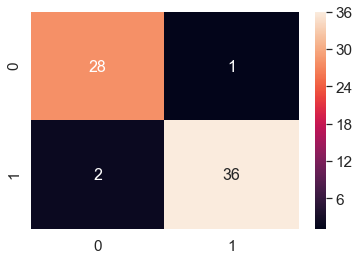

In [43]:
#####################################
df_cm_lr = pd.DataFrame(cm_lr, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_lr, annot=True, annot_kws={"size": 16}) #font size


plt.show()

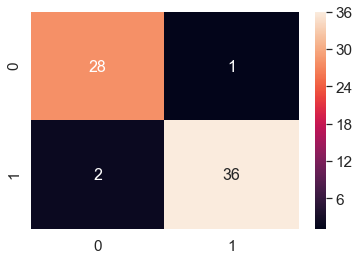

In [44]:
df_cm_dt = pd.DataFrame(cm_dt, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_dt, annot=True, annot_kws={"size": 16}) #font size


plt.show()

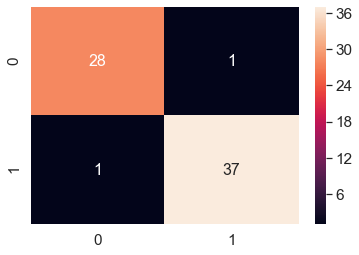

In [45]:
df_cm_nb = pd.DataFrame(cm_nb, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_nb, annot=True, annot_kws={"size": 16}) #font size


plt.show()

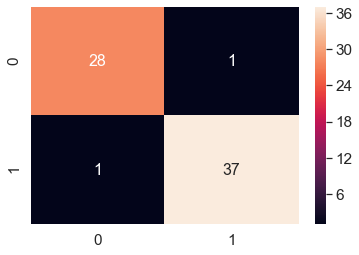

In [46]:
df_cm_svm = pd.DataFrame(cm_svm, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_svm, annot=True, annot_kws={"size": 16}) #font size


plt.show()

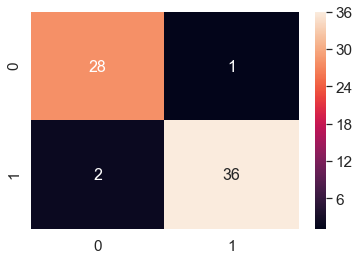

In [47]:
df_cm_knn = pd.DataFrame(cm_knn, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_knn, annot=True, annot_kws={"size": 16}) #font size

plt.show()

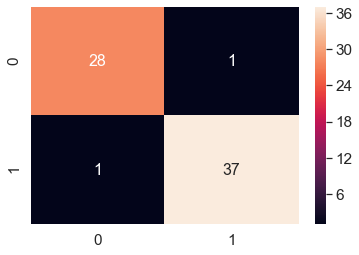

In [48]:
df_cm_rf = pd.DataFrame(cm_rf, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_rf, annot=True, annot_kws={"size": 16}) #font size

plt.show()

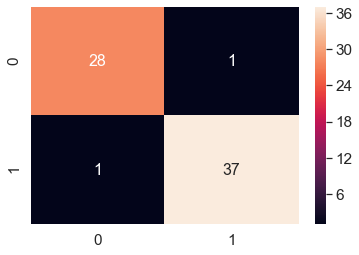

In [61]:
df_cm_ksvm = pd.DataFrame(cm_ksvm, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_ksvm, annot=True, annot_kws={"size": 16}) #font size

plt.show()

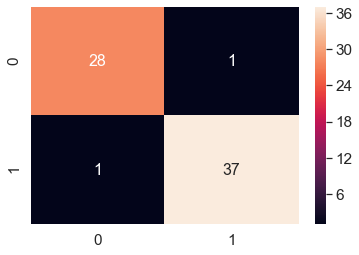

In [62]:
df_cm_xgb = pd.DataFrame(cm_xgb, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_xgb, annot=True, annot_kws={"size": 16}) #font size

plt.show()

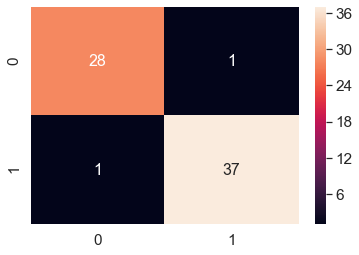

In [63]:
df_cm_lgb = pd.DataFrame(cm_lgb, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_lgb, annot=True, annot_kws={"size": 16}) #font size

plt.show()

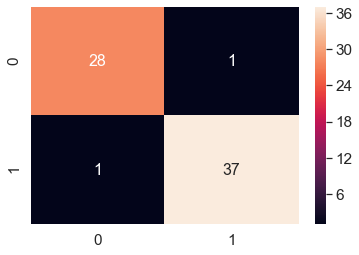

In [64]:
df_cm_cgb = pd.DataFrame(cm_cgb, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_cgb, annot=True, annot_kws={"size": 16}) #font size

plt.show()